In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color, measure, morphology, filters

In [34]:
image=io.imread("lung window(image analysis).jpeg")
if len(image.shape)==3:
    gray_image=color.rgb2gray(image)
else:
    gray_image=image.copy()
    

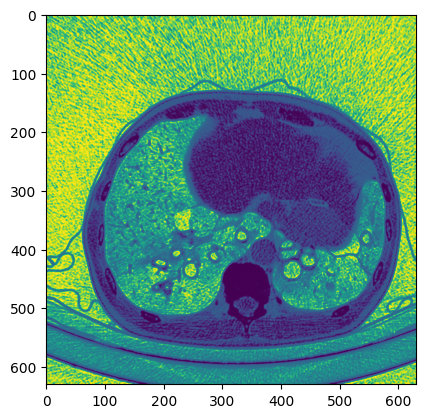

In [35]:
denoised=cv2.GaussianBlur(gray_image, (5,5),0)
contrast_enhanced=cv2.equalizeHist((denoised*255).astype(np.uint8))
plt.imshow(contrast_enhanced)

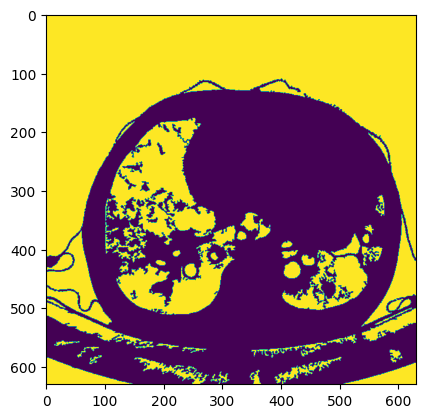

In [36]:
thresh=filters.threshold_otsu(contrast_enhanced)
binary=contrast_enhanced>thresh
binary_cleaned=morphology.remove_small_holes(binary, area_threshold=64)
binary_cleaned=morphology.remove_small_objects(binary_cleaned,min_size=100)
plt.imshow(binary_cleaned)

In [37]:
label_image=measure.label(binary_cleaned)
regions=measure.regionprops(label_image, intensity_image=contrast_enhanced)

(-0.5, 629.5, 629.5, -0.5)

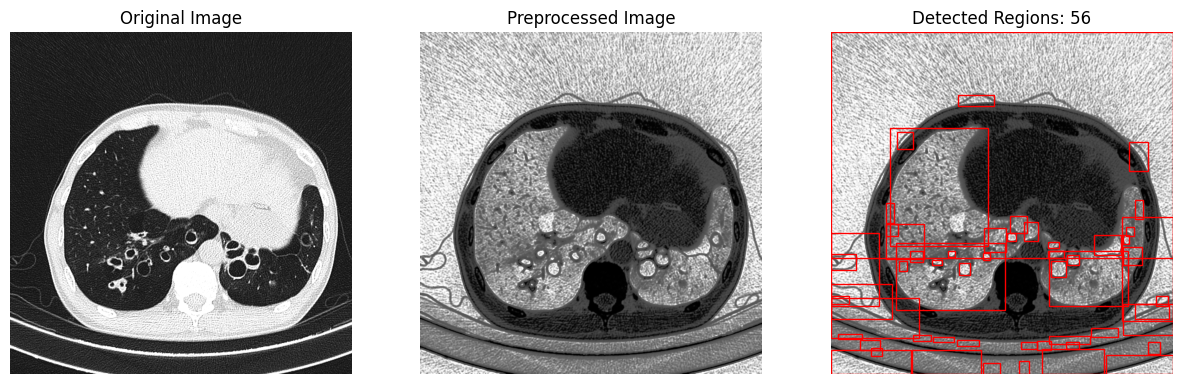

In [38]:
detected_regions=[]
for region in regions:
    if region.area>=100:
        detected_regions.append(region)

fig, axes=plt.subplots(1,3, figsize=(15,5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(contrast_enhanced, cmap='gray')
axes[1].set_title('Preprocessed Image')
axes[1].axis('off')

axes[2].imshow(contrast_enhanced, cmap='gray')
for region in detected_regions:
    minr, minc, maxr, maxc=region.bbox
    rect=plt.Rectangle((minc,minr),maxc-minc,maxr-minr, fill=False, edgecolor='red')
    axes[2].add_patch(rect)
axes[2].set_title(f'Detected Regions: {len(detected_regions)}')
axes[2].axis('off')

In [41]:
for i, region in enumerate(detected_regions, 1):
    print(f'Region{i}: Area={region.area}, Perimeter={region.perimeter}')

Region1: Area=125282.0, Perimeter=2752.9524522539964
Region2: Area=504.0, Perimeter=139.84062043356596
Region3: Area=18379.0, Perimeter=2809.361794651236
Region4: Area=124.0, Perimeter=73.29036790187178
Region5: Area=345.0, Perimeter=128.33199846221441
Region6: Area=244.0, Perimeter=143.25483399593907
Region7: Area=156.0, Perimeter=124.39087296526012
Region8: Area=571.0, Perimeter=131.46803743153546
Region9: Area=4578.0, Perimeter=580.8954903232549
Region10: Area=384.0, Perimeter=120.11879502661797
Region11: Area=106.0, Perimeter=79.97056274847714
Region12: Area=1223.0, Perimeter=682.1858582251266
Region13: Area=112.0, Perimeter=55.04163056034261
Region14: Area=965.0, Perimeter=245.17261889578035
Region15: Area=4485.0, Perimeter=419.56349186104046
Region16: Area=180.0, Perimeter=49.21320343559643
Region17: Area=684.0, Perimeter=149.46803743153546
Region18: Area=136.0, Perimeter=42.38477631085023
Region19: Area=151.0, Perimeter=51.04163056034261
Region20: Area=10034.0, Perimeter=1275.00